**CODING ASSIGNMENT: Question 1**

Question has two subparts in it......

In first Part we have to Implement a CNN in which the input is a noisy number and the output is a denoised number.[**Convolution AutoEncoder for Image Denoising**]
It was mentioned to use MNIST dataset and Use Gaussian distribution to add noise to the input. Plot the training & validation loss.

In second part we need to build 
Build a classifier based on the trained Autoencoder. Extract the trained encoder and add some fully connected layers to classify the digits . 

**Importing Necessary Packages**

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
import matplotlib.pyplot as PLT
from keras.models import Model
import numpy as NP



In [0]:
# This Function will take input as PRED_LABEL and ACTUAL LABEL  and PLOT Confusion MATRIX.
def CONFUSION_MATRIX(PRED_LABEL,Y_TEST):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    plt.figure()
    cm = confusion_matrix(np.array(Y_TEST),np.array(PRED_LABEL))
   # class_label = ['0','1','2','3','4','5','6','7','8','9']
    DATA = pd.DataFrame(cm)#, index = class_label, columns = class_label)
    sns.heatmap(DATA , annot = True, fmt = "d")
    plt.title("Confusiion Matrix for TEST DATA")
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.show()

Loading MNIST Dataset and Splitting it into Train,validation and Test Set. 

In [0]:

(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = mnist.load_data()
(X_TRAIN,VAL_DATA,Y_TRAIN,VAL_LABEL)= train_test_split(X_TRAIN,Y_TRAIN, test_size=0.33, random_state=42)

print("Shape of TRAIN DATA: {}".format(X_TRAIN.shape))
print("Shape of VALIDATION DATA: {}".format(VAL_DATA.shape))
print("Shape of TEST DATA: {}".format(X_TEST.shape))

print("Shape of TRAIN LABEL: {}".format(Y_TRAIN.shape))
print("Shape of VALIDATION LABEL: {}".format(VAL_LABEL.shape))
print("Shape of TEST LABEL: {}".format(Y_TEST.shape))

Shape of TRAIN DATA: (40200, 28, 28)
Shape of VALIDATION DATA: (19800, 28, 28)
Shape of TEST DATA: (10000, 28, 28)
Shape of TRAIN LABEL: (40200,)
Shape of VALIDATION LABEL: (19800,)
Shape of TEST LABEL: (10000,)


One Hot Encoding Of Label

In [0]:
Y_TEST = keras.utils.to_categorical(Y_TEST)
Y_TRAIN = keras.utils.to_categorical(Y_TRAIN)
VAL_LABEL = keras.utils.to_categorical(VAL_LABEL)

In [0]:
print("Shape of TRAIN LABEL: {}".format(Y_TRAIN.shape))
print("Shape of VAL_LABEL LABEL: {}".format(VAL_LABEL.shape))
print("Shape of TEST LABEL: {}".format(Y_TEST.shape))

Shape of TRAIN LABEL: (40200, 10)
Shape of VAL_LABEL LABEL: (19800, 10)
Shape of TEST LABEL: (10000, 10)


In [0]:
X_TRAIN  = X_TRAIN/255
X_TEST = X_TEST/255
VAL_DATA= VAL_DATA/255

## **Convolution Autoencoder for image denoising**

1.Deep learning neural networks require that image data be provided as three-dimensional arrays.

2.This applies even if your image is grayscale. In this case, the additional dimension for the single color channel must be added.

In [0]:
X_TRAIN = NP.reshape(X_TRAIN, (len(X_TRAIN), 28, 28, 1))  # using `channels_first` image data format
X_TEST = NP.reshape(X_TEST, (len(X_TEST), 28, 28, 1)) 
VAL_DATA = NP.reshape(VAL_DATA, (len(VAL_DATA), 28, 28, 1)) 

In [0]:
print("Shape of TRAIN DATA: {}".format(X_TRAIN.shape))
print("Shape of TEST DATA: {}".format(X_TEST.shape))
print("Shape of VAL DATA: {}".format(VAL_DATA.shape))

Shape of TRAIN DATA: (40200, 28, 28, 1)
Shape of TEST DATA: (10000, 28, 28, 1)
Shape of VAL DATA: (19800, 28, 28, 1)


**Adding Noise to an Image.**

In [0]:
noise_factor = 0.5
mean = 0.0
std_dev = 1.0
X_TRAIN_NOISY = X_TRAIN + noise_factor * NP.random.normal(loc=mean, scale=std_dev, size=X_TRAIN.shape) 
X_TEST_NOISY = X_TEST+ noise_factor * NP.random.normal(loc=mean, scale=std_dev, size=X_TEST.shape) 
VAL_DATA_NOISY = VAL_DATA+ noise_factor * NP.random.normal(loc=mean, scale=std_dev, size=VAL_DATA.shape) 

**Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.**

In [0]:
X_TRAIN_NOISY = NP.clip(X_TRAIN_NOISY, 0., 1.)
X_TEST_NOISY = NP.clip(X_TEST_NOISY, 0., 1.)
VAL_DATA_NOISY = NP.clip(VAL_DATA_NOISY,0.,1.)

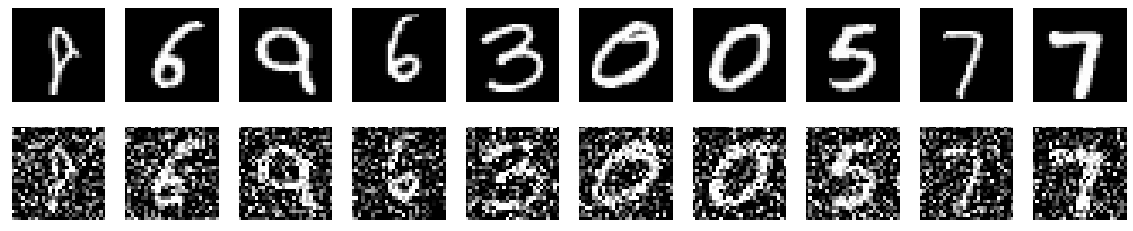

In [0]:

n = 10  # Number of  digits we will display
PLT.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = PLT.subplot(2, n, i + 1)
    PLT.imshow(X_TRAIN[i].reshape(28, 28))
    PLT.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = PLT.subplot(2, n, i + 1 + n)
    PLT.imshow(X_TRAIN_NOISY[i].reshape(28, 28))
    PLT.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
PLT.show()

**Implementing Convolution Autoencoder**

In [0]:



input_img = Input(shape=(28, 28, 1)) 

X = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
X = MaxPooling2D((2, 2), padding='same')(X)
X = Conv2D(32, (3, 3), activation='relu', padding='same')(X)
ENCODED = MaxPooling2D((2, 2), padding='same')(X)

# at this point the representation is (7, 7, 32)

X = Conv2D(32, (3, 3), activation='relu', padding='same')(ENCODED)
X = UpSampling2D((2, 2))(X)
X = Conv2D(32, (3, 3), activation='relu', padding='same')(X)
X = UpSampling2D((2, 2))(X)
DECODED = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(X)

AUTOENCODER = Model(input_img, DECODED)
ENCODER = Model(input_img, ENCODED)

In [0]:
AUTOENCODER.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 14, 14, 32)        0  

In [0]:
ENCODER.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


In [0]:


AUTOENCODER.compile(optimizer='adadelta', loss='binary_crossentropy')
#Let's train it for 20 epochs:

HISTORY = AUTOENCODER.fit(X_TRAIN_NOISY,X_TRAIN,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(VAL_DATA_NOISY,VAL_DATA))

Train on 40200 samples, validate on 19800 samples
Epoch 1/20
40200/40200 [==============================] - 5s 128us/step - loss: 0.2197 - val_loss: 0.1397
Epoch 2/20
40200/40200 [==============================] - 3s 76us/step - loss: 0.1322 - val_loss: 0.1251
Epoch 3/20
40200/40200 [==============================] - 3s 74us/step - loss: 0.1189 - val_loss: 0.1145
Epoch 4/20
40200/40200 [==============================] - 3s 75us/step - loss: 0.1134 - val_loss: 0.1141
Epoch 5/20
40200/40200 [==============================] - 3s 75us/step - loss: 0.1102 - val_loss: 0.1119
Epoch 6/20
40200/40200 [==============================] - 3s 74us/step - loss: 0.1081 - val_loss: 0.1223
Epoch 7/20
40200/40200 [==============================] - 3s 75us/step - loss: 0.1061 - val_loss: 0.1102
Epoch 8/20
40200/40200 [==============================] - 3s 75us/step - loss: 0.1052 - val_loss: 0.1062
Epoch 9/20
40200/40200 [==============================] - 3s 74us/step - loss: 0.1042 - val_loss: 0.1052
Epoc

In [0]:
ENCODED_IMG = AUTOENCODER.predict(X_TEST_NOISY)

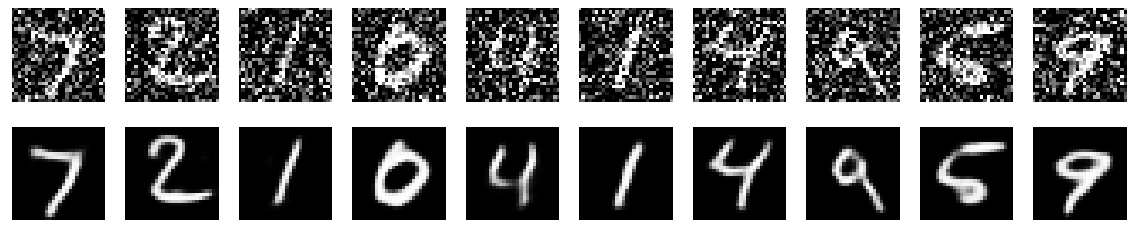

In [0]:

n = 10  # how many digits we will display
PLT.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = PLT.subplot(2, n, i + 1)
    PLT.imshow(X_TEST_NOISY[i].reshape(28, 28))
    PLT.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = PLT.subplot(2, n, i + 1 + n)
    PLT.imshow(ENCODED_IMG[i].reshape(28, 28))
    PLT.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
PLT.show()

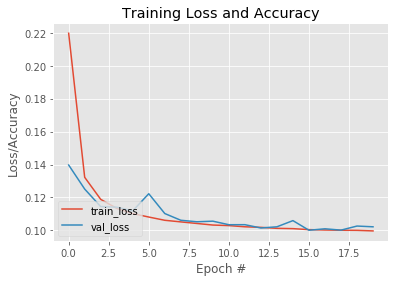

In [0]:
N = np.arange(0, 20)
PLT.style.use("ggplot")
PLT.figure()
PLT.plot(N, HISTORY.history["loss"], label="train_loss")
PLT.plot(N, HISTORY.history["val_loss"], label="val_loss")
PLT.title("Training Loss and Accuracy")
PLT.xlabel("Epoch #")
PLT.ylabel("Loss/Accuracy")
PLT.legend(loc="lower left")


In [0]:
ENCODER.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


## **BUILDING CLASSIFIER..........**

In [0]:

from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Sequential

# Flattening the output layer from encoder part.....
FLAT = Flatten()(ENCODED)

HIDDEN_LAYER_1 = Dense(100, activation='relu')(FLAT)
HIDDEN_LAYER_2 = Dense(60, activation='relu')(HIDDEN_LAYER_1)
HIDDEN_LAYER_3 = Dense(40, activation='relu')(HIDDEN_LAYER_2)
OUTPUT = Dense(10, activation='softmax')(HIDDEN_LAYER_3)

model = Model(inputs=input_img, outputs=OUTPUT)

In [0]:
model.summary()


Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               156

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:

EPOCH=20
BATCH_SIZE=128
FINAL_MODEL = model.fit(X_TRAIN,Y_TRAIN,batch_size=BATCH_SIZE,epochs=EPOCH,verbose=1,validation_data=(VAL_DATA,VAL_LABEL))

Train on 40200 samples, validate on 19800 samples
Epoch 1/20
40200/40200 [==============================] - 5s 119us/step - loss: 0.3278 - acc: 0.8994 - val_loss: 0.1115 - val_acc: 0.9668
Epoch 2/20
40200/40200 [==============================] - 2s 62us/step - loss: 0.0798 - acc: 0.9757 - val_loss: 0.0706 - val_acc: 0.9778
Epoch 3/20
40200/40200 [==============================] - 3s 63us/step - loss: 0.0540 - acc: 0.9827 - val_loss: 0.0559 - val_acc: 0.9832
Epoch 4/20
40200/40200 [==============================] - 3s 64us/step - loss: 0.0399 - acc: 0.9878 - val_loss: 0.0580 - val_acc: 0.9822
Epoch 5/20
40200/40200 [==============================] - 2s 62us/step - loss: 0.0358 - acc: 0.9892 - val_loss: 0.0527 - val_acc: 0.9844
Epoch 6/20
40200/40200 [==============================] - 3s 64us/step - loss: 0.0259 - acc: 0.9920 - val_loss: 0.0630 - val_acc: 0.9823
Epoch 7/20
40200/40200 [==============================] - 3s 64us/step - loss: 0.0229 - acc: 0.9930 - val_loss: 0.0447 - val_ac

In [0]:

TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,EPOCH+1))

In [0]:

TEST_ACCURACY = []
score =model.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.048110127598877304
Test accuracy: 0.9898


Text(0, 0.5, 'Cross Entropy Loss')

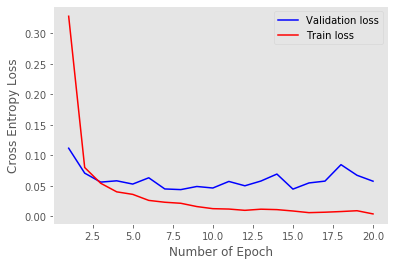

In [0]:

PLT.plot(X,VAL_LOSS,'b',label="Validation loss")
PLT.plot(X,TRAIN_LOSS,'r',label='Train loss')
PLT.legend()
PLT.grid()
PLT.xlabel("Number of Epoch")
PLT.ylabel('Cross Entropy Loss')



**Validation Loss is greater than Training Loss .....Model Is overfitting..so let's add some Dropout layer   and see whether we can generalize the model ....or not**

In [0]:
PREDICTION = model.predict(X_TEST)

In [0]:
# Checking Accuracy on Test sample
PRED_LABEL=[]
ACTUAL_LABEL=[]

for sample in range(0,Y_TEST.shape[0]):
    PRED_LABEL.append(NP.argmax(PREDICTION[sample]))
    ACTUAL_LABEL.append(NP.argmax(Y_TEST[sample]))
  

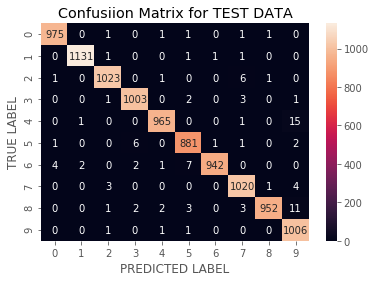

In [0]:

CONFUSION_MATRIX(PRED_LABEL,ACTUAL_LABEL)

**Same Model with some Dropout layer in it....so that we can make sure we are not overfitting .**

In [0]:

MODEL = Sequential()
MODEL.add(encoder)
MODEL.add(Flatten())
MODEL.add(Dense(100, activation='relu'))
MODEL.add(Dropout(0.5))
MODEL.add(Dense(60, activation='relu'))
MODEL.add(Dropout(0.5))
MODEL.add(Dense(40, activation='relu'))
MODEL.add(Dropout(0.5))
MODEL.add(Dense(10, activation='softmax'))


In [0]:
MODEL.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_8 (Model)              (None, 7, 7, 32)          9568      
_________________________________________________________________
flatten_21 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_77 (Dense)             (None, 100)               156900    
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 60)                6060      
_________________________________________________________________
dropout_21 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 40)              

In [0]:
MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
EPOCH=20
BATCH_SIZE=128
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=BATCH_SIZE,epochs=EPOCH,verbose=1,validation_data=(VAL_DATA,VAL_LABEL))
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']




Train on 40200 samples, validate on 19800 samples
Epoch 1/20
40200/40200 [==============================] - 5s 126us/step - loss: 0.9371 - acc: 0.6744 - val_loss: 0.0748 - val_acc: 0.9820
Epoch 2/20
40200/40200 [==============================] - 3s 68us/step - loss: 0.2320 - acc: 0.9299 - val_loss: 0.0525 - val_acc: 0.9890
Epoch 3/20
40200/40200 [==============================] - 3s 66us/step - loss: 0.1547 - acc: 0.9553 - val_loss: 0.0481 - val_acc: 0.9904
Epoch 4/20
40200/40200 [==============================] - 3s 65us/step - loss: 0.1167 - acc: 0.9661 - val_loss: 0.0609 - val_acc: 0.9895
Epoch 5/20
40200/40200 [==============================] - 3s 66us/step - loss: 0.0975 - acc: 0.9732 - val_loss: 0.0468 - val_acc: 0.9914
Epoch 6/20
40200/40200 [==============================] - 3s 64us/step - loss: 0.0825 - acc: 0.9766 - val_loss: 0.0553 - val_acc: 0.9904
Epoch 7/20
40200/40200 [==============================] - 3s 67us/step - loss: 0.0777 - acc: 0.9784 - val_loss: 0.0523 - val_ac

Test score: 0.059330458248507856
Test accuracy: 0.9915


Text(0, 0.5, 'Cross Entropy Loss')

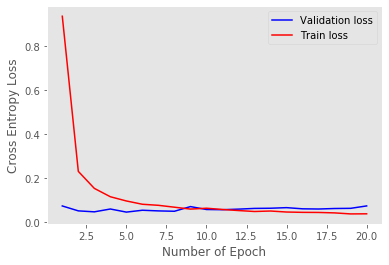

In [0]:
TEST_ACCURACY = []
score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
X = list(range(1,EPOCH+1))
PLT.plot(X,VAL_LOSS,'b',label="Validation loss")
PLT.plot(X,TRAIN_LOSS,'r',label='Train loss')
PLT.legend()
PLT.grid()
PLT.xlabel("Number of Epoch")
PLT.ylabel('Cross Entropy Loss')

**This Looks Preety good..**

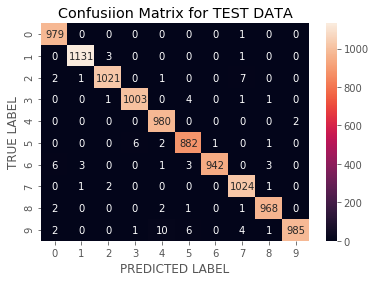

In [0]:

# Checking Accuracy on Test sample
PREDICTION = MODEL.predict(X_TEST)
PRED_LABEL=[]
ACTUAL_LABEL=[]
for sample in range(0,Y_TEST.shape[0]):
    PRED_LABEL.append(NP.argmax(PREDICTION[sample]))
    ACTUAL_LABEL.append(NP.argmax(Y_TEST[sample]))
  
CONFUSION_MATRIX(PRED_LABEL,ACTUAL_LABEL)

**Conclusion and My approach in Nutshell:**

First I load MNIST dataset from keras, splited it into three parts 

Training Data (Used to Trained model)

Validation Data(Used For Hyper Parameter Tuning)

Test Data(Used to evaluate Model Perfomance)

Then did one hot encoding of label and take care of image data format.

Convolution Autoencoder Architecture Which I build for image denoising:





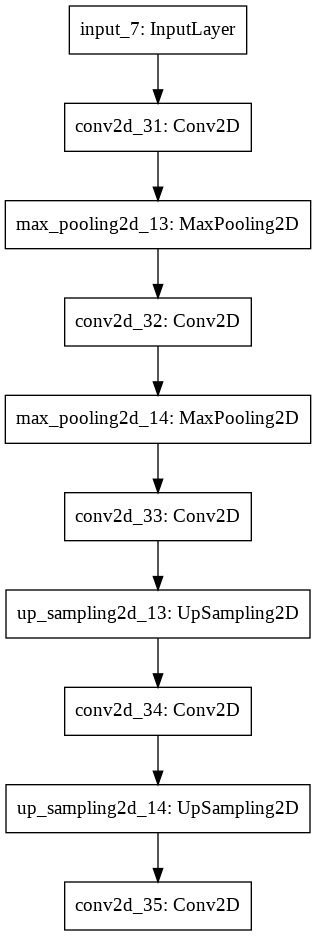

In [0]:

plot_model(AUTOENCODER)


**For second part  Extracted  the trained encoder and add some fully connected layers to classify the digits,....From Train and Validation Loss plot it is clearly visible model is overfitting then ....to overcome it I have added Dropout layer.**

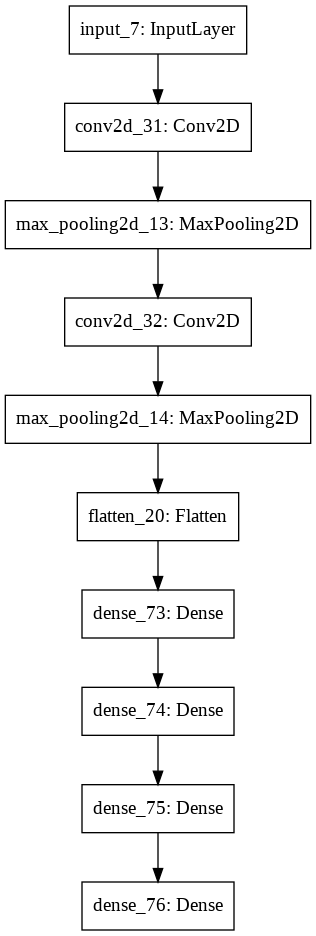

In [0]:

plot_model(model)


**Same Model With Dropout:**

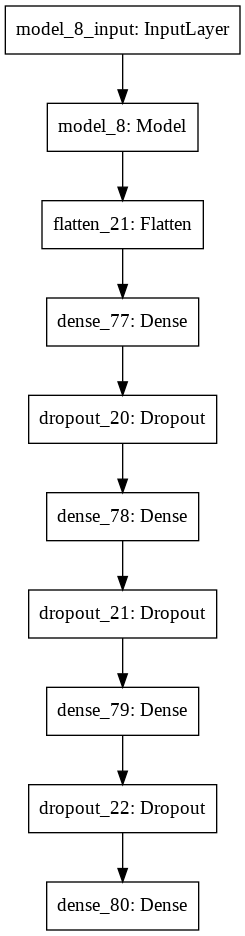

In [0]:

plot_model(MODEL)
